In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

# Project Overview
We are interested in clustering customers into different groups based on their satisfaction with the nightclub’s pricing strategy, whether they would return or recommend the club to friends, and other demographic variables. We hope to provide some strategies for the nightclub to improve customer satisfaction and increase customer return rates.

For the project, we tried three types of clustering: K-prototype, K-means, and hierarchical clustering

## Data Loading

To conduct this investigation, we examined a nightclub customer information dataset

**Nightclub.csv**: include demographic information such as gender, age, ethnicity, income...AND customers' rating about nightclub's pricing policy & intention to revist or recommend.

In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')
# Path to CSV file in Google Drive
path_to_csv = '/content/drive/My Drive/Short Term Paper 2/Nightclub.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
nightclub_data = pd.read_csv(path_to_csv, low_memory=False)
nightclub_data

,CustomerType,Pricing_Strategy,Fair1,Fair2,Fair3,WOM_1,WOM_2,WOM_3,RI_1,RI_2,RI_3,FAM1,FAM2,Nightclub_Frequency,Gender,Age,Ethnicity,Income,Employment_status,Education
0,Frequent customer,Time of a day,2.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,1.0,2.0,2.0,Once a Week,Male,21.0,caucasian,$50.000 - $79.999,Student,Some college
1,Frequent customer,VIP entrance,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,3.0,Once a Month,Female,35.0,other,under $20.000,Retired,Some college
2,Frequent customer,VIP entrance,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,3.0,Once a Month,Female,26.0,pacific islander,under $20.000,Retired,Some college
3,Frequent customer,Flat pricing,4.0,3.0,2.0,3.0,3.0,1.0,5.0,3.0,5.0,3.0,3.0,2-3 Times a Month,Male,27.0,hispanic,$50.000 - $79.999,Full time employed,Bachelor’s degree
4,First time customer,Flat pricing,5.0,6.0,5.0,1.0,2.0,1.0,2.0,3.0,4.0,5.0,5.0,Less than Once a Month,Male,54.0,caucasian,under $20.000,Student,Some college
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Frequent customer,VIP entrance,7.0,6.0,6.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,3.0,Once a Week,Male,22.0,caucasian,$20.000 - $49.999,Full time employed,Some college
246,Frequent customer,Flat pricing,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,Once a Week,Male,27.0,caucasian,under $20.000,Student,Some college
247,Frequent customer,Flat pricing,5.0,5.0,5.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,6.0,Once a Week,Male,30.0,hispanic,$20.000 - $49.999,Full time employed,High school diploma
248,Frequent customer,Flat pricing,6.0,6.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,Once a Week,Male,21.0,caucasian,under $20.000,Student,Some college


# Data Preprocessing

In [ ]:
nightclub_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerType         250 non-null    object 
 1   Pricing_Strategy     250 non-null    object 
 2   Fair1                250 non-null    float64
 3   Fair2                250 non-null    float64
 4   Fair3                250 non-null    float64
 5   WOM_1                250 non-null    float64
 6   WOM_2                250 non-null    float64
 7   WOM_3                250 non-null    float64
 8   RI_1                 250 non-null    float64
 9   RI_2                 250 non-null    float64
 10  RI_3                 250 non-null    float64
 11  FAM1                 250 non-null    float64
 12  FAM2                 250 non-null    float64
 13  Nightclub_Frequency  250 non-null    object 
 14  Gender               250 non-null    object 
 15  Age                  249 non-null    flo

In [ ]:
nightclub_data.describe()

,Fair1,Fair2,Fair3,WOM_1,WOM_2,WOM_3,RI_1,RI_2,RI_3,FAM1,FAM2,Age
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,249.000000
mean,4.752000,4.764000,4.832000,4.540000,4.656000,4.588000,4.784000,4.412000,4.736000,4.280000,3.852000,32.654618
std,1.662997,1.631857,1.574067,1.478222,1.462264,1.534822,1.598614,1.508429,1.571043,1.745217,1.564573,12.361213
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000
25%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,22.000000
50%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.500000,5.000000,5.000000,4.000000,28.000000
75%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,42.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,70.000000


In [ ]:
nightclub_data.isna().sum()

,0
CustomerType,0
Pricing_Strategy,0
Fair1,0
Fair2,0
Fair3,0
WOM_1,0
WOM_2,0
WOM_3,0
RI_1,0
RI_2,0


The only null value appears to be the Age column for one row. We can replace this with the median age.

In [ ]:
nightclub_data[nightclub_data['Age'].isna()]

,CustomerType,Pricing_Strategy,Fair1,Fair2,Fair3,WOM_1,WOM_2,WOM_3,RI_1,RI_2,RI_3,FAM1,FAM2,Nightclub_Frequency,Gender,Age,Ethnicity,Income,Employment_status,Education
56,First time customer,Flat pricing,2.0,4.0,2.0,4.0,4.0,4.0,2.0,2.0,2.0,4.0,4.0,2-3 Times a Month,Female,NaN,caucasian,$80.000 - $99.999,Full time employed,Some college


In [ ]:
median_age = nightclub_data['Age'].median()
nightclub_data['Age'] = nightclub_data['Age'].fillna(value=median_age)

Next we will standardize the numerical variables.

In [ ]:
num_features = ['Fair1', 'Fair2', 'Fair3', 'WOM_1',	'WOM_2', 'WOM_3', 'RI_1', 'RI_2',	'RI_3',	'FAM1',	'FAM2', 'Age']
nightclub_data[num_features] = (nightclub_data[num_features] - nightclub_data[num_features].mean()) / nightclub_data[num_features].std()
nightclub_data.describe()

,Fair1,Fair2,Fair3,WOM_1,WOM_2,WOM_3,RI_1,RI_2,RI_3,FAM1,FAM2,Age
count,2.500000e+02,2.500000e+02,2.500000e+02,250.000000,2.500000e+02,2.500000e+02,2.500000e+02,2.500000e+02,2.500000e+02,2.500000e+02,2.500000e+02,2.500000e+02
mean,1.705303e-16,-1.421085e-16,1.705303e-16,0.000000,1.705303e-16,-1.136868e-16,2.273737e-16,1.705303e-16,5.684342e-17,-1.278977e-16,2.842171e-17,-2.486900e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.256168e+00,-2.306575e+00,-2.434458e+00,-2.394769,-2.500232e+00,-2.337730e+00,-2.367051e+00,-2.261956e+00,-2.378038e+00,-1.879422e+00,-1.822862e+00,-9.429591e-01
25%,-4.521957e-01,-4.681784e-01,-5.285671e-01,-0.365304,-4.486193e-01,-3.831063e-01,-4.904249e-01,-2.731319e-01,-4.684785e-01,-7.334331e-01,-5.445576e-01,-8.619210e-01
50%,1.491284e-01,1.446206e-01,1.067299e-01,0.311185,2.352516e-01,2.684350e-01,1.351171e-01,5.833885e-02,1.680412e-01,4.125561e-01,9.459452e-02,-3.756925e-01
75%,7.504525e-01,7.574195e-01,7.420269e-01,0.987673,9.191225e-01,9.199764e-01,7.606590e-01,1.052751e+00,8.045609e-01,9.855507e-01,7.337467e-01,7.588406e-01
max,1.351777e+00,1.370218e+00,1.377324e+00,1.664161,1.602993e+00,1.571518e+00,1.386201e+00,1.715693e+00,1.441081e+00,1.558545e+00,2.012051e+00,3.027907e+00


In [ ]:
nightclub_data[num_features].corr()

,Fair1,Fair2,Fair3,WOM_1,WOM_2,WOM_3,RI_1,RI_2,RI_3,FAM1,FAM2,Age
Fair1,1.000000,0.773043,0.840111,0.577477,0.592353,0.548276,0.602160,0.553207,0.589707,0.217748,0.209648,-0.178201
Fair2,0.773043,1.000000,0.792828,0.607443,0.583514,0.560720,0.583858,0.493223,0.584969,0.223539,0.206482,-0.150671
Fair3,0.840111,0.792828,1.000000,0.658775,0.646548,0.661105,0.663823,0.572216,0.652710,0.249640,0.232842,-0.113778
WOM_1,0.577477,0.607443,0.658775,1.000000,0.870340,0.877307,0.765040,0.731928,0.753357,0.246274,0.246543,-0.168836
WOM_2,0.592353,0.583514,0.646548,0.870340,1.000000,0.883210,0.777279,0.745473,0.788948,0.212577,0.202350,-0.134722
WOM_3,0.548276,0.560720,0.661105,0.877307,0.883210,1.000000,0.780354,0.786564,0.772490,0.254644,0.238749,-0.136875
RI_1,0.602160,0.583858,0.663823,0.765040,0.777279,0.780354,1.000000,0.839801,0.907865,0.234809,0.266557,-0.151397
RI_2,0.553207,0.493223,0.572216,0.731928,0.745473,0.786564,0.839801,1.000000,0.812077,0.241281,0.245458,-0.134742
RI_3,0.589707,0.584969,0.652710,0.753357,0.788948,0.772490,0.907865,0.812077,1.000000,0.214556,0.227487,-0.155995
FAM1,0.217748,0.223539,0.249640,0.246274,0.212577,0.254644,0.234809,0.241281,0.214556,1.000000,0.730049,-0.134365


The fairness ratings are the most correlated with each other.

In [ ]:
nightclub_data['CustomerType'].value_counts()

,count
CustomerType,
Frequent customer,125
First time customer,125


In [ ]:
nightclub_data['Gender'].value_counts()

,count
Gender,
Female,134
Male,116


There are only 2 categories for the CustomerType variable, so we'll change it to 1 for Frequent customer, and 0 for First time customer. We'll do the same for Gender, with 1 being Female and 0 being Male.

In [ ]:
nightclub_data['CustomerType'] = nightclub_data['CustomerType'].map({'Frequent customer': '1', 'First time customer': '0'})
nightclub_data['Gender'] = nightclub_data['Gender'].map({'Female': '1', 'Male': '0'})

In [ ]:
nightclub_data['Nightclub_Frequency'].value_counts()

,count
Nightclub_Frequency,
Once a Week,72
2-3 Times a Month,66
2-3 Times a Week,40
Less than Once a Month,37
Once a Month,34
Daily,1


In [ ]:
nightclub_data['Income'].value_counts()

,count
Income,
under $20.000,81
$20.000 - $49.999,71
$100.000 or over,49
$50.000 - $79.999,26
$80.000 - $99.999,23


We'll simplify the Nightclub_Frequency and Income categories to Low, Medium, and High.

In [ ]:
nightclub_data['Nightclub_Frequency'] = nightclub_data['Nightclub_Frequency'].map({'2-3 Times a Week': 'High', 'Daily': 'High', 'Once a Week': 'Medium', '2-3 Times a Month': 'Medium', 'Once a Month': 'Low', 'Less than Once a Month': 'Low'})
nightclub_data['Income'] = nightclub_data['Income'].map({'$100.000 or over': 'High', '$80.000 - $99.999': 'Medium', '$50.000 - $79.999': 'Medium', '$20.000 - $49.999': 'Low', 'under $20.000': 'Low'})
nightclub_data['Education'] = nightclub_data['Education'].map({'Some high school': 1, 'High school diploma': 1.5, 'Some college': 2, 'Bachelor’s degree': 2.5, 'Some graduate school': 3, 'Master’s degree': 3.5, 'Doctoral degree': 4})

In [ ]:
nightclub_data

,CustomerType,Pricing_Strategy,Fair1,Fair2,Fair3,WOM_1,WOM_2,WOM_3,RI_1,RI_2,RI_3,FAM1,FAM2,Nightclub_Frequency,Gender,Age,Ethnicity,Income,Employment_status,Education
0,1,Time of a day,-1.654844,-1.693776,-1.799161,-2.394769,-2.500232,-2.337730,-1.741509,-0.936073,-2.378038,-1.306428,-1.183710,Medium,0,-0.942959,caucasian,Medium,Student,2.0
1,1,VIP entrance,-2.256168,-2.306575,-2.434458,-2.394769,-2.500232,-2.337730,-2.367051,-2.261956,-2.378038,-0.160438,-0.544558,Low,1,0.191574,other,Low,Retired,2.0
2,1,VIP entrance,-2.256168,-2.306575,-2.434458,-2.394769,-2.500232,-2.337730,-2.367051,-2.261956,-2.378038,-0.160438,-0.544558,Low,1,-0.537769,pacific islander,Low,Retired,2.0
3,1,Flat pricing,-0.452196,-1.080977,-1.799161,-1.041792,-1.132490,-2.337730,0.135117,-0.936073,0.168041,-0.733433,-0.544558,Medium,0,-0.456731,hispanic,Medium,Full time employed,2.5
4,0,Flat pricing,0.149128,0.757420,0.106730,-2.394769,-1.816361,-2.337730,-1.741509,-0.936073,-0.468479,0.412556,0.733747,Low,0,1.731297,caucasian,Low,Student,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,1,VIP entrance,1.351777,0.757420,0.742027,0.987673,1.602993,1.571518,0.760659,1.052751,0.804561,0.985551,-0.544558,Medium,0,-0.861921,caucasian,Low,Full time employed,2.0
246,1,Flat pricing,1.351777,1.370218,1.377324,1.664161,1.602993,1.571518,1.386201,1.715693,1.441081,1.558545,2.012051,Medium,0,-0.456731,caucasian,Low,Student,2.0
247,1,Flat pricing,0.149128,0.144621,0.106730,1.664161,1.602993,1.571518,1.386201,1.715693,1.441081,1.558545,1.372899,Medium,0,-0.213616,hispanic,Low,Full time employed,1.5
248,1,Flat pricing,0.750452,0.757420,0.742027,1.664161,1.602993,1.571518,1.386201,1.715693,1.441081,1.558545,2.012051,Medium,0,-0.942959,caucasian,Low,Student,2.0


For the categorical columns, we'll have to use one-hot encoding for K-Means.

In [ ]:
cat_features = ['CustomerType', 'Pricing_Strategy', 'Gender', 'Ethnicity', 'Nightclub_Frequency', 'Income', 'Employment_status', 'Education']

encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(nightclub_data[cat_features])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(cat_features))

nightclub_encoded = pd.concat([nightclub_data, one_hot_df], axis=1)
nightclub_encoded = nightclub_encoded.drop(cat_features, axis=1)

In order to visualize the clusters later, PCA is needed to reduce the dimensionality of our dataset.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
nightclub_standardized = scaler.fit_transform(nightclub_encoded) ##Standardize the features again since we have encoded the categorical variables

pca = PCA(n_components = 2)
nightclub_pca = pca.fit_transform(nightclub_standardized) ##Implement PCA

# K-Prototypes Clustering

We started with the k-prototypes method, which is designed for handling mixed data types. 

In [ ]:
def plot_clusters_seaborn(X, labels, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', edgecolor='k', s=100)
    plt.title(title)
    plt.show()

In [ ]:
!pip install kmodes
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score

In [ ]:
# index of categorical columns
cat_idx = [0, 1, 13, 14, 16, 17, 18, 19]

We'll plot the silhouette scores against different values of k to see what gives the best results for k-prototypes.

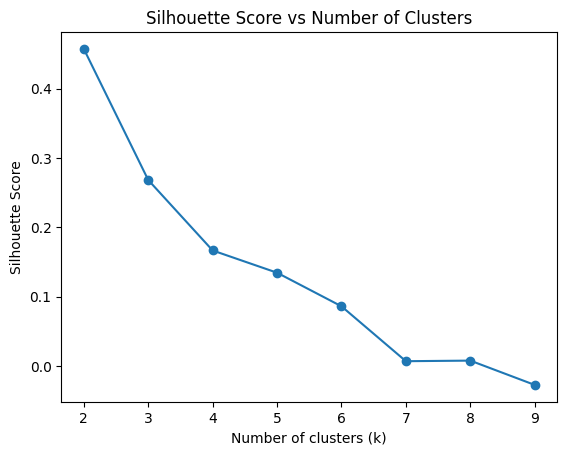

In [ ]:
silhouette_scores = []
for k in range(2,10):
  kproto = KPrototypes(n_clusters=k)
  proto_clusters = kproto.fit_predict(nightclub_data.values, categorical=cat_idx)
  s_score = silhouette_score(nightclub_pca, proto_clusters)
  silhouette_scores.append(s_score)

plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

Using the elbow method, I'll use 3 clusters.

Silhouette score: 0.27579152018020875


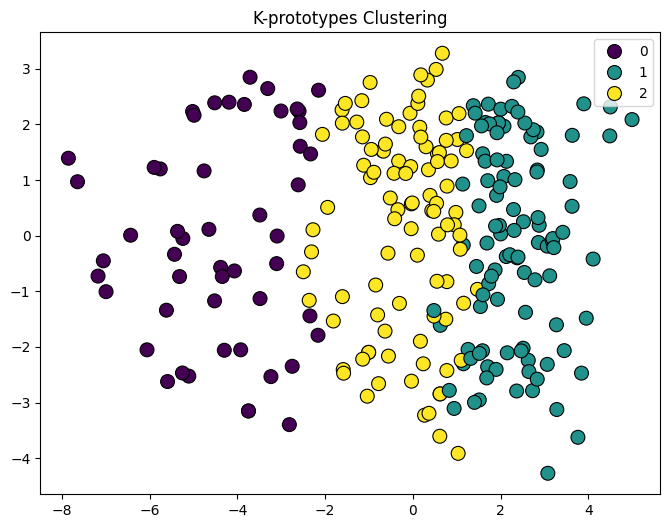

In [ ]:
kproto = KPrototypes(n_clusters=3)
proto_clusters = kproto.fit_predict(nightclub_data.values, categorical=cat_idx)
s_score = silhouette_score(nightclub_pca, proto_clusters)
print('Silhouette score:', s_score)
plot_clusters_seaborn(nightclub_pca, proto_clusters, 'K-prototypes Clustering')

# K-Means

Then, we applied K-Means clustering using the one-hot encoding of the categorical variables. By trying different values of k and measuring the silhouette score, we chose three, which ensure the performance of the clustering while not compromising the distinctiveness of each group. 

0.4010606926323957


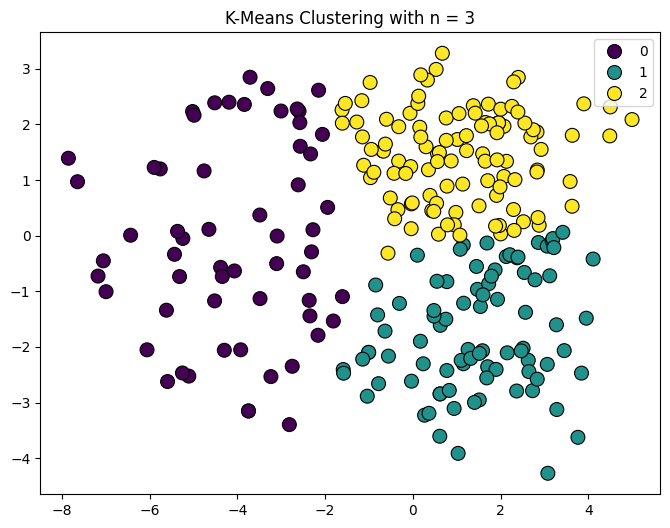

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3) ##With 3 clusters
kmeans.fit(nightclub_pca)

labels = kmeans.labels_
silh_score = silhouette_score(nightclub_pca, labels) ##Silhouette score
print(silh_score)

plot_clusters_seaborn(nightclub_pca, labels, 'K-Means Clustering with n = 3') ##Plot

# Hierarchical Clustering

Unlike K-means and K-prototypes methods, hierarchical clustering works better for the datasets without a prior knowledge about the number of clusters. Also, it accepts the mixed data through selecting an appropraite distance measurements.

We plotted a dendrogram to represent the hierarchical relationship of our clustering. By analyzing the dendrogram, we were able to observe the point at which clusters merge and assess the distance at the junctions. Finally, we select five clusters by identifying significant gaps where the merge distance suddenly increases. 

<ipython-input-26-4dd296f31ec7>:19: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method='average')


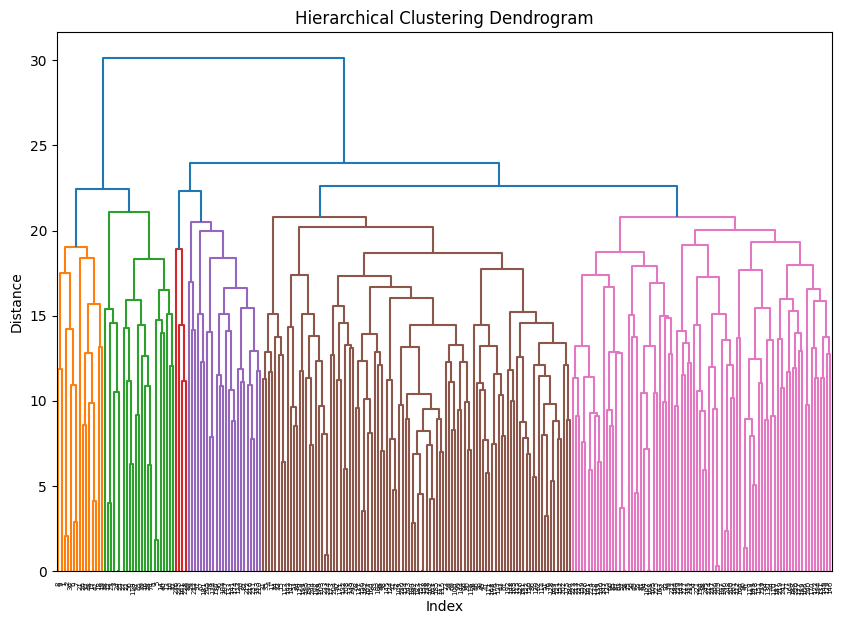

In [ ]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage

nightclub_data_temp = nightclub_data.copy()
nightclub_data_temp = nightclub_data_temp[['Fair1', 'Fair2', 'Fair3', 'WOM_1', 'WOM_2', 'WOM_3', 'RI_1', 'RI_2', 'RI_3', 'FAM1', 'FAM2', 'Age', 'CustomerType', 'Pricing_Strategy', 'Nightclub_Frequency', 'Gender', 'Ethnicity', 'Income', 'Employment_status', 'Education']]


def weighted_distance(x, y, numeric_indices, categorical_indices, numeric_weight):
    numeric_diff = x[numeric_indices] - y[numeric_indices]
    numeric_dist = np.sqrt(np.dot(numeric_diff, numeric_diff))  #Euclidean distance for numerical vars
    categorical_dist = np.sum(x[categorical_indices] != y[categorical_indices])  #Dissimilarity for categorical vars
    return numeric_weight * numeric_dist + (1 - numeric_weight) * categorical_dist  #Combined

#Indices
numeric_indices = range(0,12)
categorical_indices = range(12,20)

distance_matrix = squareform(pdist(nightclub_data_temp.values, lambda u, v: weighted_distance(u, v, numeric_indices, categorical_indices, numeric_weight=0.4)))
Z = linkage(distance_matrix, method='average')

#Plot Dendrogram
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z, labels=nightclub_data.index.to_list(), orientation='top', leaf_rotation=90.)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

#Create labels
clustering = AgglomerativeClustering(n_clusters=5, linkage='average')
agg_labels = clustering.fit_predict(distance_matrix)
nightclub_data_temp['cluster'] = agg_labels
nightclub_data_temp['cluster'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:586: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


,count
cluster,
3,100
1,84
0,28
2,23
4,15


# Interpretation

Since K-Means worked the best, we'll try to see what attributes the customers had in each cluster.

In [ ]:
labels = kmeans.labels_
nightclub_data['Clusters'] = labels

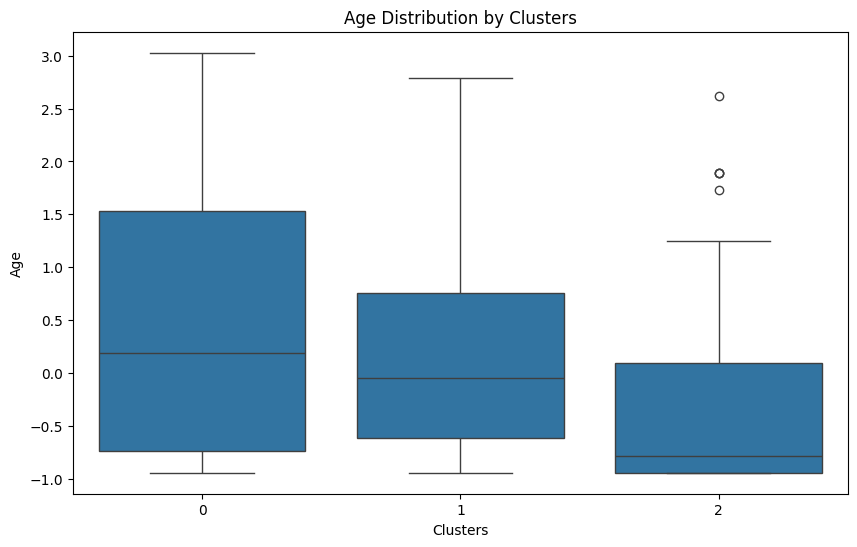

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Clusters', y='Age', data=nightclub_data)
plt.title('Age Distribution by Clusters')
plt.show()

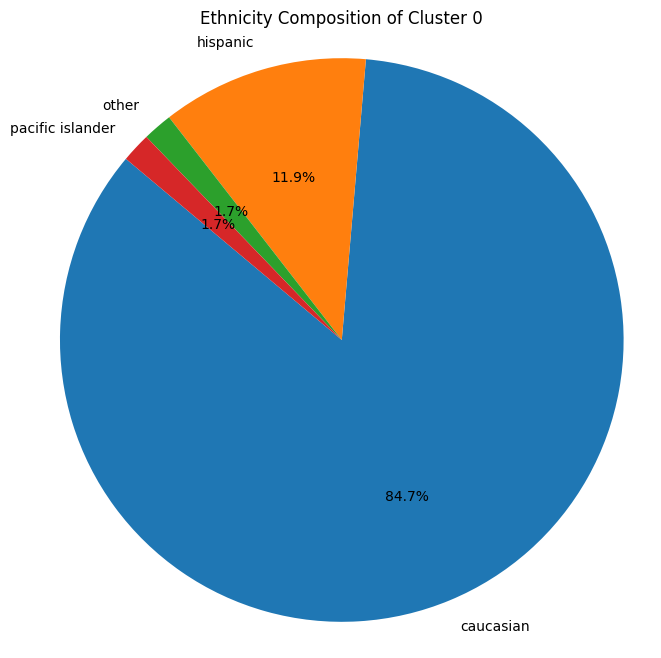

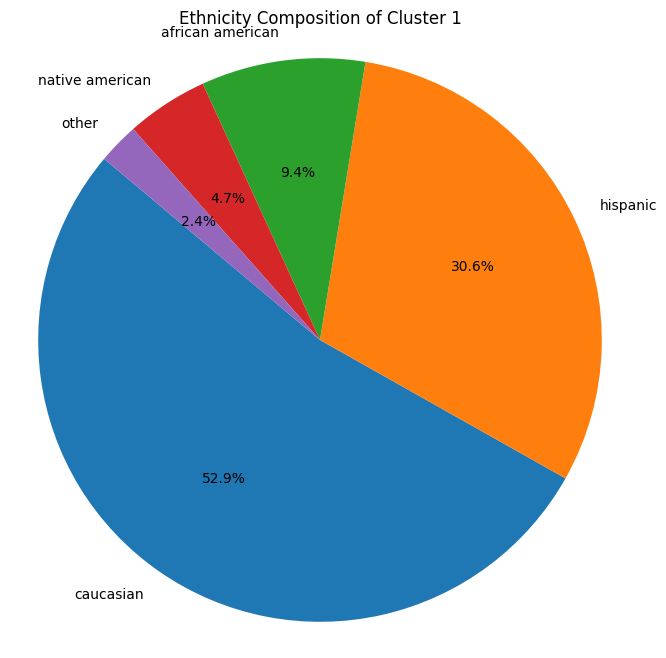

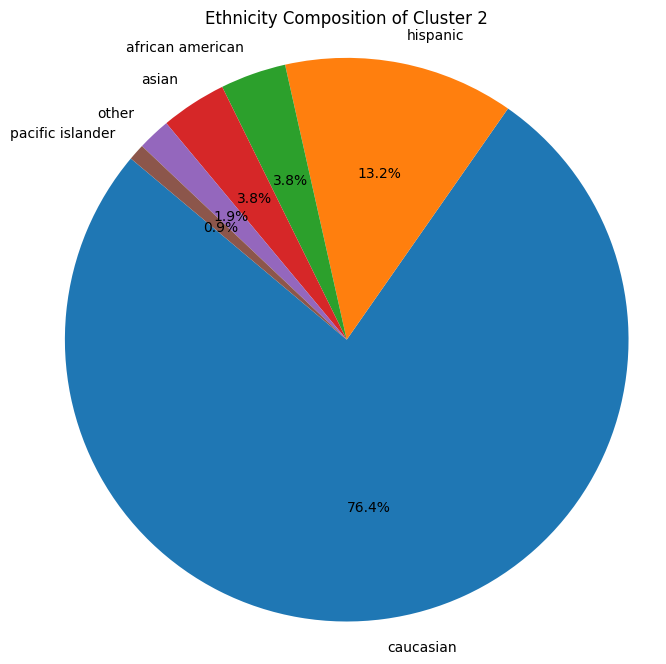

In [ ]:
nightclub_cluster_0 = nightclub_data[nightclub_data['Clusters'] == 0]
income_counts = nightclub_cluster_0['Ethnicity'].value_counts()
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Ethnicity Composition of Cluster 0')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

nightclub_cluster_1 = nightclub_data[nightclub_data['Clusters'] == 1]
income_counts = nightclub_cluster_1['Ethnicity'].value_counts()
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Ethnicity Composition of Cluster 1')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

nightclub_cluster_2 = nightclub_data[nightclub_data['Clusters'] == 2]
income_counts = nightclub_cluster_2['Ethnicity'].value_counts()
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Ethnicity Composition of Cluster 2')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()


In [ ]:
# computing the average value for numerical columns
nightclub_data['fair_avg'] = nightclub_data[['Fair1', 'Fair2', 'Fair3']].mean(axis=1)
nightclub_data['wom_avg'] = nightclub_data[['WOM_1', 'WOM_2', 'WOM_3']].mean(axis=1)
nightclub_data['ri_avg'] = nightclub_data[['RI_1', 'RI_2', 'RI_3']].mean(axis=1)
nightclub_data['fam_avg'] = nightclub_data[['FAM1', 'FAM2']].mean(axis=1)

In [ ]:
nightclub_data[['fair_avg', 'wom_avg']]

,fair_avg,wom_avg
0,-1.715927,-2.410910
1,-2.332400,-2.410910
2,-2.332400,-2.410910
3,-1.110778,-1.504004
4,0.337759,-2.182953
...,...,...
245,0.950408,1.387395
246,1.366440,1.612891
247,0.133493,1.612891
248,0.749966,1.612891


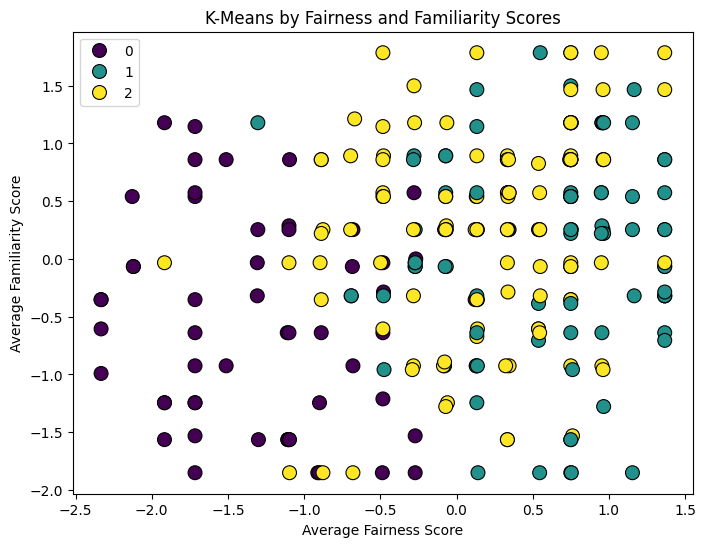

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=nightclub_data['fair_avg'].values, y=nightclub_data['fam_avg'].values, hue=labels, palette='viridis', edgecolor='k', s=100)
plt.title('K-Means by Fairness and Familiarity Scores')
plt.xlabel("Average Fairness Score")
plt.ylabel("Average Familiarity Score")
plt.show()

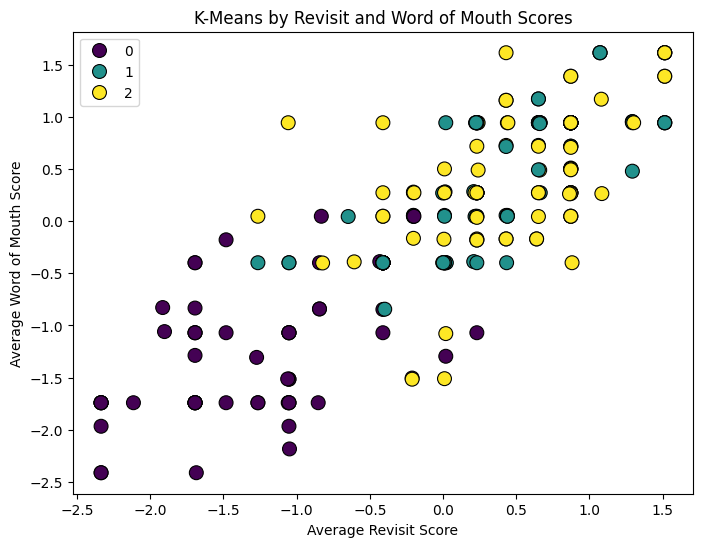

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=nightclub_data['ri_avg'].values, y=nightclub_data['wom_avg'].values, hue=labels, palette='viridis', edgecolor='k', s=100)
plt.title('K-Means by Revisit and Word of Mouth Scores')
plt.xlabel("Average Revisit Score")
plt.ylabel("Average Word of Mouth Score")
plt.show()

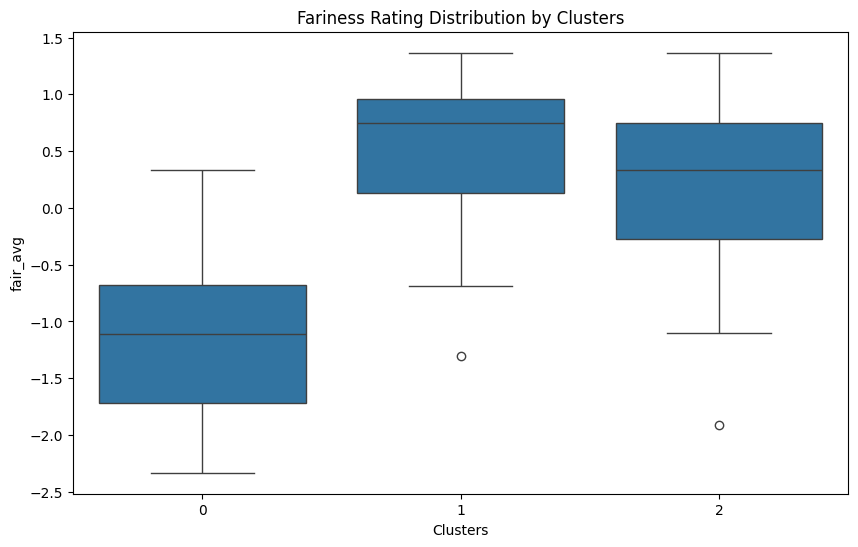

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Clusters', y='fair_avg', data=nightclub_data)
plt.title('Fariness Rating Distribution by Clusters')
plt.show()

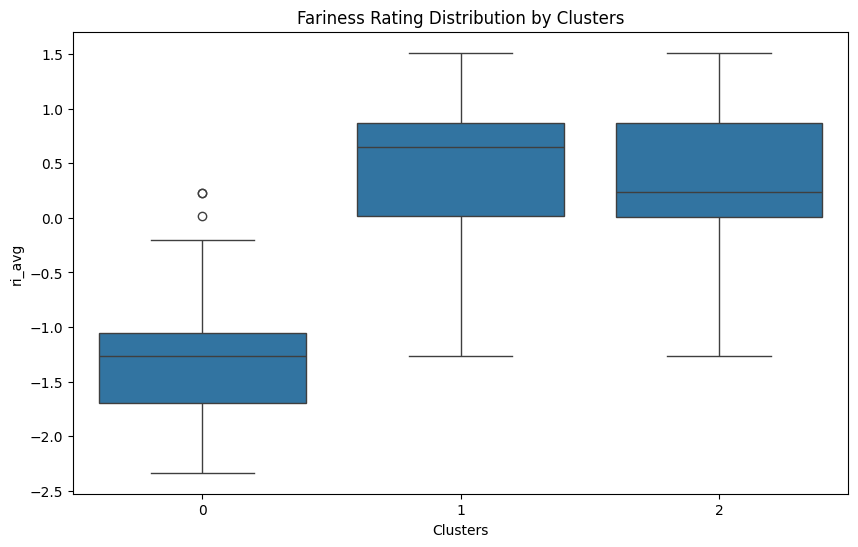

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Clusters', y='ri_avg', data=nightclub_data)
plt.title('Fariness Rating Distribution by Clusters')
plt.show()

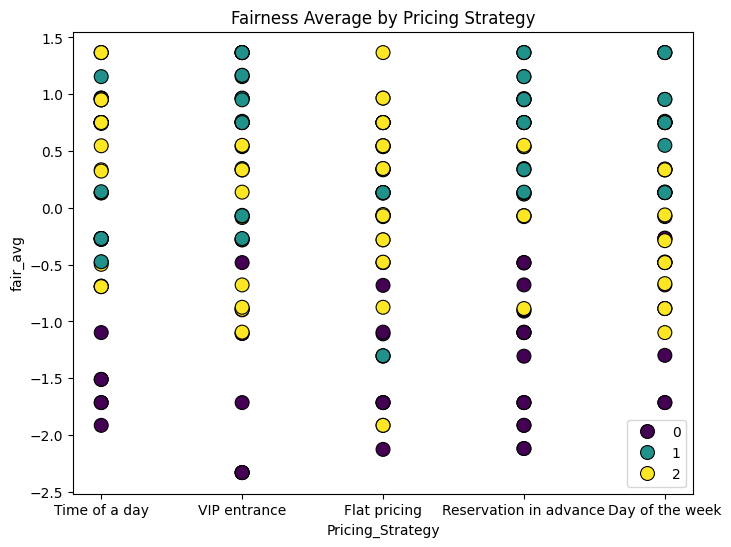

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=nightclub_data['Pricing_Strategy'], y=nightclub_data['fair_avg'], hue=labels, palette='viridis', edgecolor='k', s=100)
plt.title('Fairness Average by Pricing Strategy')
plt.show()

In [ ]:
labels = kmeans.labels_
nightclub_encoded['Clusters'] = labels
nightclub_encoded.columns
nightclub_clustered = nightclub_encoded.groupby(['Clusters']).agg({'Pricing_Strategy_Day of the week': 'sum', 'Pricing_Strategy_Flat pricing': 'sum', 'Pricing_Strategy_Reservation in advance': 'sum', 'Pricing_Strategy_Time of a day': 'sum', 'Pricing_Strategy_VIP entrance': 'sum'})
nightclub_clustered

,Pricing_Strategy_Day of the week,Pricing_Strategy_Flat pricing,Pricing_Strategy_Reservation in advance,Pricing_Strategy_Time of a day,Pricing_Strategy_VIP entrance
Clusters,,,,,
0,8.0,12.0,19.0,10.0,10.0
1,18.0,8.0,17.0,17.0,25.0
2,24.0,30.0,14.0,23.0,15.0


After clustering, we analyzed the demographic characteristics of each groups, like age distribution and ethnicity decomposition. Cluster 0 has wider age range and cluster 1 is composed by younger customers. Also, while the ethnicity composition reveals that Caucasian people are the main customers for each group, Hispanic people make up a significant portion of cluster 2. Then, we investigated the relationship between the clusters and the satisfaction rating. By plotting the clusters with the different perception rating scores, cluster 0’s attitudes seem different than the other two clusters. This cluster tended to be more dissatisfied with the nightclub, and were also unfamiliar with the pricing strategy. Also, we investigated the pricing strategy mostly common used by each clusters, finding that cluster 0 preferred the reservation, while cluster 1 prefers the flat pricing and cluster 2 likes the VIP entrance most.